# GROVER lösen SODUKU Problem

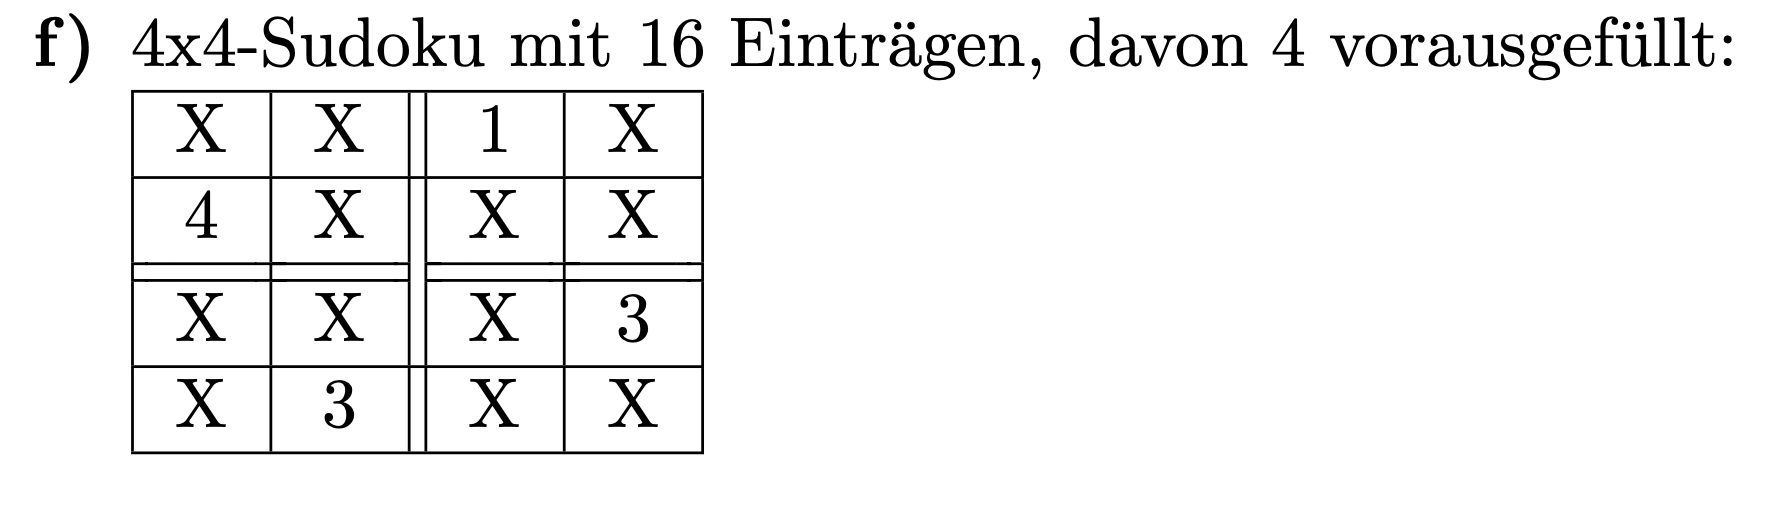

In [73]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister,\
    ClassicalRegister,transpile, Aer, IBMQ,execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.transpiler.passes import Unroller
from qiskit.transpiler import PassManager

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-10-18 02:21:44,054: Credentials are already in use. The existing account in the session will be replaced.


In [74]:
def reflection(qc,x):
    '''Performs reflection around state |0>: adds a negative phase only to state |0>'''
    qc.x(x) #apply X to whole register
    qc.h(x[-1]) #apply hadamard to last qubit
    qc.mcx(x[:-1],x[-1]) #apply multi control x gate
    qc.h(x[-1])
    qc.x(x)
def diffuser(qc,x):
    '''Transforms superposition state |s> -> |0>, reflects about |0>
    and transforms back to |s> again.'''
    qc.h(x)
    reflection(qc,x)
    qc.h(x)

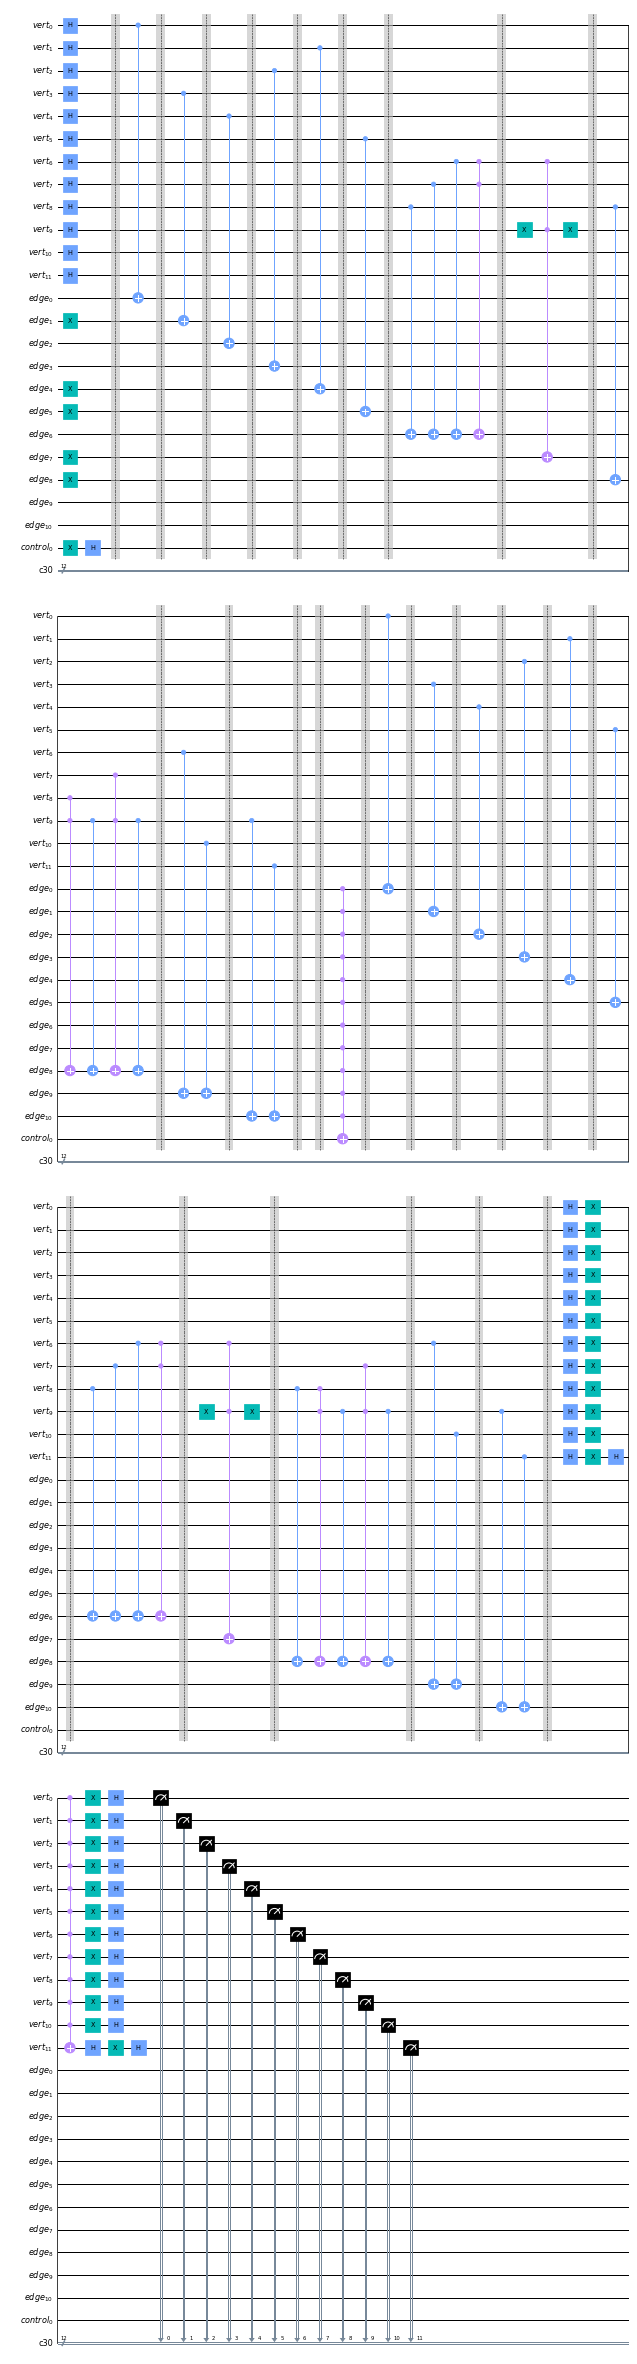

In [106]:
vert = QuantumRegister(12, name ='vert')
edg = QuantumRegister(11, name ='edge')
contr = QuantumRegister(1, name ='control')
cr = ClassicalRegister(12)
qc = QuantumCircuit(vert, edg, contr, cr)
qc.h(vert[:])
#inifizierung von edges
qc.x(edg[1])
qc.x(edg[4])
qc.x(edg[5])
qc.x(edg[7])
qc.x(edg[8])
# qc.x(edg[9])
# qc.x(edg[11])
# qc.x(edg[15])
#set control qubit in state |->
qc.x(contr)
qc.h(contr)
qc.barrier()

#encode edges
#1-2
qc.cx(vert[0], edg[0])
qc.barrier()
#2-4
qc.cx(vert[3], edg[1])
qc.barrier()
#5-6
qc.cx(vert[4], edg[2])
qc.barrier()
#3-6
qc.cx(vert[2], edg[3])
qc.barrier()
#2
qc.cx(vert[1],edg[4])
qc.barrier()
#6
qc.cx(vert[5],edg[5])
qc.barrier()
#7-8
qc.cx(vert[8], edg[6])
qc.cx(vert[7], edg[6])
qc.cx(vert[6], edg[6])
qc.ccx(vert[6], vert[7], edg[6])
qc.barrier()
#7-9
qc.x(vert[9])
qc.ccx(vert[6], vert[9], edg[7])
qc.x(vert[9])
qc.barrier()
#8-9
qc.cx(vert[8], edg[8])
qc.ccx(vert[8], vert[9], edg[8])
qc.cx(vert[9], edg[8])
qc.ccx(vert[7], vert[9], edg[8])
qc.cx(vert[9], edg[8])
qc.barrier()
#7-10
qc.cx(vert[6],edg[9])
qc.cx(vert[10],edg[9])
qc.barrier()
#9-11
qc.cx(vert[9],edg[10])
qc.cx(vert[11],edg[10])
qc.barrier()
#add negative amplitude to the state with all ones (all edges connecting nodes with different colours)
qc.barrier()
qc.mcx(edg,contr)
qc.barrier()
#encode edges
#1-2
qc.cx(vert[0], edg[0])
qc.barrier()
#2-4
qc.cx(vert[3], edg[1])
qc.barrier()
#5-6
qc.cx(vert[4], edg[2])
qc.barrier()
#3-6
qc.cx(vert[2], edg[3])
qc.barrier()
#2
qc.cx(vert[1],edg[4])
qc.barrier()
#6
qc.cx(vert[5],edg[5])
qc.barrier()
#7-8
qc.cx(vert[8], edg[6])
qc.cx(vert[7], edg[6])
qc.cx(vert[6], edg[6])
qc.ccx(vert[6], vert[7], edg[6])
qc.barrier()
#7-9
qc.x(vert[9])
qc.ccx(vert[6], vert[9], edg[7])
qc.x(vert[9])
qc.barrier()
#8-9
qc.cx(vert[8], edg[8])
qc.ccx(vert[8], vert[9], edg[8])
qc.cx(vert[9], edg[8])
qc.ccx(vert[7], vert[9], edg[8])
qc.cx(vert[9], edg[8])
qc.barrier()
#7-10
qc.cx(vert[6],edg[9])
qc.cx(vert[10],edg[9])
qc.barrier()
#9-11
qc.cx(vert[9],edg[10])
qc.cx(vert[11],edg[10])
qc.barrier()
#diffuser
diffuser(qc,vert[:])

qc.measure(vert[:],cr)
qc.draw('mpl', scale=0.5)

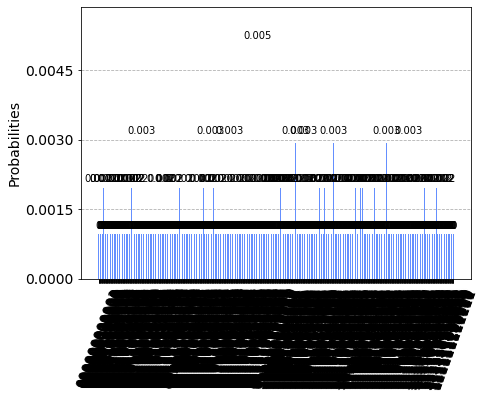

In [107]:
#run on simulator
backend = Aer.get_backend('qasm_simulator') 
result = execute(qc, backend).result()

plot_histogram(result.get_counts())

In [108]:
result = result.get_counts(qc).most_frequent()

In [109]:
result

'011100010101'

### Kosten:

In [110]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc)
ops = new_circuit.count_ops()
print(ops)
cost = ops['u3'] + 10 * ops['cx'] 
print("Cost: " + str(cost))

OrderedDict([('u3', 12431), ('cx', 12360), ('barrier', 25), ('measure', 12)])
Cost: 136031


In [111]:
from qiskit import QuantumCircuit, Aer, assemble, IBMQ, transpile
for kk in range(4):
    trans_qc = transpile(qc, basis_gates=['cx', 'u3'], optimization_level=kk)
    
    #display(trans_qc.draw())
    print('Optimization Level {}'.format(kk))
    print('Depth:', trans_qc.depth())
    print('Gate counts:', trans_qc.count_ops())

Optimization Level 0
Depth: 20603
Gate counts: OrderedDict([('u3', 12431), ('cx', 12360), ('barrier', 25), ('measure', 12)])
Optimization Level 1
Depth: 20594
Gate counts: OrderedDict([('u3', 12391), ('cx', 12360), ('barrier', 25), ('measure', 12)])
Optimization Level 2
Depth: 20594
Gate counts: OrderedDict([('u3', 12391), ('cx', 12360), ('barrier', 25), ('measure', 12)])
Optimization Level 3
Depth: 20592
Gate counts: OrderedDict([('u3', 12393), ('cx', 12358), ('barrier', 25), ('measure', 12)])


In [112]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(trans_qc)
ops = new_circuit.count_ops()
print(ops)
cost = ops['u3'] + 10 * ops['cx'] 
print("Cost: " + str(cost))

OrderedDict([('u3', 12393), ('cx', 12358), ('barrier', 25), ('measure', 12)])
Cost: 135973
